In [2]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install jieba

  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314476 sha256=f39f8cf2a051bda6aa945195ca01391a417357bbb23bde65cf5113b6d4a1aaad
  Stored in directory: c:\users\kiddc\appdata\local\pip\cache\wheels\ca\38\d8\dfdfe73bec1d12026b30cb7ce8da650f3f0ea2cf155ea018ae
Successfully built jieba
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=d71666f30cce581f333cfd0937cd03eaaf4e79a41b7ba52a363e3b748297f494
  Stored in directory: c:\users\kiddc\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import logging
from sqlalchemy import create_engine
import jieba

In [3]:
class MysqlDataFrame:
    def __init__(self, user, pwd, db='tfb1031_project', ip='10.2.16.174'):
        self.user = user
        self.pwd = pwd
        self.db = db
        self.__conn_ip = ip
        self.__stopWords = [
            'alter', 'update', 'delete', 'drop', 'insert',
            'table', 'database'
            ]
        self.__sysDatabase = [
            'information_schema', 'performance_schema', 'mysql',
            'sakila', 'sys', 'world'
            ]

    def __repr__(self):
        return '''
        1. Call "show_info()" to get the db & table list
        2. Call "get_pandas_df()" to get a pd.DataFrame from MySQL table
        3. Call "use_sql_query()" to get a pd.DataFrame with customized SQL 
        4. Call "insert_pandas_df()" to insert pd.DataFrame to MySQL 
        5. Call "convert_str_to_list()" to convert string to list, return pd.series
        '''

    def __create_conn(self):
        try:
            engine = create_engine(
                f'mysql+pymysql://{self.user}:{self.pwd}@{self.__conn_ip}:3306/{self.db}'
                )
            return engine
        except Exception as err:
            print(logging.error(str(err)))

    def show_info(self):
        engine = self.__create_conn()

        # Get db list
        sql_db = 'SHOW databases;'
        query_db = engine.execute(sql_db).fetchall()
        db = [i[0] for j, i in enumerate(query_db) if i[0] not in self.__sysDatabase]
        # Get table list
        sql_table = 'SHOW tables;'
        query_table = engine.execute(sql_table).fetchall()
        table = [i[0] for i in query_table]

        information = f'Use db = {self.db}\nUser = {self.user}\nDatabase list = {db}\nTable list =  {table}'
        return print(information)

    def get_pandas_df(self, table='test'):
        engine = self.__create_conn()
        sql = f'select * from {table};'
        try:
            df = pd.read_sql_query(sql, engine)
            return df
        except Exception as err:
            print(logging.error(str(err)))

    # Use user-defined SQL
    def use_sql_query(self, input_sql):
        engine = self.__create_conn()
        for word in self.__stopWords:
            if word in input_sql:
                return print("Please don't alter the data")
        try:
            df = pd.read_sql_query(input_sql, engine)
            return df
        except Exception as err:
            print(logging.error(str(err)))

    def insert_pandas_df(self, df, table):
        engine = self.__create_conn()
        try:
            df.to_sql(table, engine, if_exists='append', index=0)
        except Exception as err:
            print(logging.error(str(err)))

    def convert_str_to_list(self, df, column):
        import ast
        return df[f'{column}'].apply(lambda x: ast.literal_eval(x))

In [4]:
data_sql = MysqlDataFrame('tfb1031_02', 'qwe123456', ip='10.2.14.12')
rest = data_sql.get_pandas_df('restaurant')

import numpy as np
restaurant = rest.copy()
restaurant = restaurant.drop(11664)
print('restaurant columns = {}'.format(restaurant.shape[0]))

mean = restaurant.price.mean()
data = restaurant.price.fillna(mean)
a , b= pd.cut(data, 180, retbins=True)
c = np.array(b, dtype='int32')
c[0] = 0

d = pd.cut(data, 180, retbins=True, labels=c[1:])[0]
price_data = pd.concat([restaurant[['res_id', 'res_name']], d], axis=1)
price_data
print(restaurant.columns)

restaurant columns = 33449
Index(['res_id', 'res_name', 'address', 'score', 'price', 'content',
       'article_url', 'image_url', 'tag'],
      dtype='object')


In [36]:
restaurant=pd.read_csv('11_27_33449_10特徵在一欄.csv')

In [2]:
restaurant_df=pd.read_csv("C:/Users/kiddc/jupyter_資料/推薦餐廳_有加地區_且有數值.csv")

In [3]:
restaurant_df

,Unnamed: 0,res_id,res_name,address,score,price,content,clean_add,clean_add_num
0,0,20000001,紅磡 新飲茶,臺北市中山區林森北路263號,4.3,600.0,"['台北老字號港式茶餐廳', '上百道高人氣港點', '粵菜', '品嚐到最正宗港式的料理風...",中山區,4.0
1,1,20000002,味津烤鴨,臺北市大同區民族西路223之17號,4.4,200.0,"['網路推爆櫻桃鴨專賣店', '片皮鴨', '鹹酥', '三杯', '醬燒雙重享受超難打通的...",大同區,3.0
2,2,20000003,萬麗軒 Wan Li Restaurant - 台北士林萬麗酒店,臺北市士林區中山北路五段470巷8號1樓,4.6,NaN,"['士林美食', '台北士林萬麗酒店', '士林廚房經典海陸套餐', '士林官邸旁', '捷...",士林區,10.0
3,3,20000004,款待 手路菜,臺北市中山區中山北路一段53巷32號,4.2,500.0,"['款待台菜', '台菜吃到飽推薦', '菜單', '價錢', '款待', '手路菜', '...",中山區,4.0
4,4,20000005,飯BAR 內湖旗艦店,臺北市內湖區內湖路一段360巷2號,4.3,500.0,"['內湖旗艦店', '中式料理也可以吃得很有儀式感', '必點花雕遇到雞', '美人茶遇東坡...",內湖區,8.0
...,...,...,...,...,...,...,...,...,...
33444,33445,20033446,老柴咖啡館,台北市羅斯福路四段150號,3.8,100.0,"['餐廳名稱：老柴咖啡館', '消費時間：2013年/8月', '地址：新北市三峽區大觀路1...",NaN,NaN
33445,33446,20033447,舒果(板橋雙十店),台北市信義區松壽路12號3F-01,3.8,398.0,"['餐廳名稱：舒果(板橋雙十店)', '消費時間：2013年/8月', '地址：新北市板橋區...",信義區,7.0
33446,33447,20033448,義想義大利麵,台北市大安區光復南路102號1樓,3.1,100.0,"['餐廳名稱：義想義大利麵', '消費時間：2013年/8月', '地址:新北市永和區文化路...",大安區,6.0
33447,33448,20033449,楔子咖啡館,台北市萬華區昆明街214號之1/新北市瑞芳區豎崎路5號,3.0,NaN,"['餐廳名稱：楔子咖啡館', '消費時間：2013/08', '地址：新北市新莊區公園路16...",中正區,1.0


In [5]:
import jieba
import jieba.analyse
import re

tmp = []
content = restaurant_df['content'].astype(str)

for i in content:
    word_list = []
    #tags = jieba.lcut("".join(re.findall('[\D.+號^[-]', i)))
    
    tags = jieba.analyse.extract_tags(i, topK=5, allowPOS=('n','ns','nz'))
    for tag in tags:
        #if tag not in stop_words_list
        word = str(tag)
        word_list.append(word) 
    tmp.append(word_list)
        
tmp

[['港式', '飲茶', '台北', '聚餐', '台北人'],
 ['烤鴨', '外帶', '櫻桃', '電話', '台北'],
 ['美食', '酒店', '廚房', '經典', '海陸'],
 ['台菜', '餐廳', '手路', '美食', '台北'],
 ['內湖', '旗艦', '西湖', '中式', '捷運'],
 ['川菜', '黔園', '老店', '西門町', '萬華'],
 ['敦化', '頂級', '雲貴川', '漢方', '食材'],
 ['食習', '台北', '文青感', '台灣', '菜單'],
 ['雜湯', '美食', '通化街', '台北', '菜色'],
 ['東坡', '美食', '美味', '台北', '廚范'],
 ['餐廳', '時尚', '新派', '松江', '台北'],
 ['水樓', '台北', '美食', '巨蛋', '小籠'],
 ['港式', '小館', '大安', '台北', '燒臘'],
 ['欣葉', '鐘菜', '經典', '台菜', '私房'],
 ['螺波', '公館', '廣西', '螺絲粉', '菜單'],
 ['鴛鴦', '火鍋', '市府', '火焰', '捷運'],
 ['鍋物', '東豐東', '火鍋', '大安', '頂級'],
 ['火鍋', '帝國', '食材', '新鮮', '皇家'],
 ['頂級', '肉品', '錦西店', '火鍋', '西路'],
 ['二本', '大安', '火鍋', '海鮮', '火鍋界'],
 ['火鍋', '鐵支', '食材', '工業', '時尚'],
 ['羊肉', '新東', '美食', '份量', '濱江'],
 ['美食', '台北', '火鍋', '現場', '外帶'],
 ['肉品', '頂級', '火鍋', '餐廳', '台北'],
 ['白肉', '酸菜', '內湖', '火鍋', '辣油'],
 ['鍋物', '火鍋', '信義', '美食', '食材'],
 ['非業', '台北'],
 ['台北', '火鍋', '蛤蜊', '美食', '美味'],
 ['汕頭', '鍋物'],
 ['鍋物', '竹間', '石頭', '甜點', '飲料'],
 ['天母', '鍋物', '火鍋', '蔬食', '外空'],
 ['鴛

In [6]:
df1=pd.DataFrame(tmp,index=restaurant_df['res_name'].head(33449))

In [7]:
df1.to_csv('K-means_11_30_33449筆數_5特徵.csv')

In [56]:
restaurant=pd.read_csv('C:/Users/kiddc/jupyter_程式/K-means_11_28_33449筆數_20特徵.csv')
restaurant_df=restaurant.set_index(['res_name'])

In [8]:
df1

,0,1,2,3,4
res_name,,,,,
紅磡 新飲茶,港式,飲茶,台北,聚餐,台北人
味津烤鴨,烤鴨,外帶,櫻桃,電話,台北
萬麗軒 Wan Li Restaurant - 台北士林萬麗酒店,美食,酒店,廚房,經典,海陸
款待 手路菜,台菜,餐廳,手路,美食,台北
飯BAR 內湖旗艦店,內湖,旗艦,西湖,中式,捷運
...,...,...,...,...,...
老柴咖啡館,老柴,咖啡,焦糖,香蕉,特區
舒果(板橋雙十店),餐廳,舒果,時間,王品,牛蒡
義想義大利麵,大利,飲料,口味,狗狗,叉子


In [9]:
df1.columns = ['w' for x in range(5)] # 更改欄位名稱 統一欄位名稱

In [10]:
one_hot_df = pd.get_dummies(df1) # one-hot encoding

In [11]:
one_hot_df

,w_一村,w_一泡,w_一甲子,w_一町,w_一緒,w_一蘭,w_丁目,w_七彩,w_七福,w_七龍,...,w_龍城,w_龍富,w_龍山,w_龍形,w_龍江,w_龍眼,w_龍蝦,w_龍門路,w_龍馬,w_龜山島
res_name,,,,,,,,,,,,,,,,,,,,,
紅磡 新飲茶,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
味津烤鴨,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
萬麗軒 Wan Li Restaurant - 台北士林萬麗酒店,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
款待 手路菜,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
飯BAR 內湖旗艦店,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
老柴咖啡館,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
舒果(板橋雙十店),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
義想義大利麵,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# create new_df
new_df=pd.DataFrame()
col_list = list(one_hot_df.columns)
for i in col_list:
    new_df[i.strip('w_')] = one_hot_df[[i]].sum(axis=1)

C:\Users\kiddc\AppData\Local\Temp/ipykernel_5804/1608565392.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  new_df[i.strip('w_')] = one_hot_df[[i]].sum(axis=1)


In [13]:
new_df

,一村,一泡,一甲子,一町,一緒,一蘭,丁目,七彩,七福,七龍,...,黑漢堡,黑炭,點爭,點餐,黨事,龍井四神湯,龍富,龍形,龍門路,龍馬
res_name,,,,,,,,,,,,,,,,,,,,,
紅磡 新飲茶,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
味津烤鴨,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
萬麗軒 Wan Li Restaurant - 台北士林萬麗酒店,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
款待 手路菜,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
飯BAR 內湖旗艦店,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
老柴咖啡館,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
舒果(板橋雙十店),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
義想義大利麵,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# from numpy import random, array

# #建立 N 個人在 K 個集群中，傳遞給 createClusteredData()
# def createClusteredData(N, k):
#     random.seed(10)
#     pointsPerCluster = float(N)/k    #找出每個集群有多少個資料點
#     X = []
#     for i in range (k):
#         incomeCentroid = random.uniform(20000.0, 200000.0)   # 建立一個隨機的中心點，在20000到200000元之間
#         ageCentroid = random.uniform(20.0, 70.0)             # 建立一個隨機的中心點，在20到70歲之間
#         for j in range(int(pointsPerCluster)):
#             X.append([random.normal(incomeCentroid, 10000.0), random.normal(ageCentroid, 2.0)])  # 建立一個散佈圖，收入和標準差
#     X = array(X)
#     return X

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True).fit(new_df)  # whiten=True 表示資料需要正規化
X_pca = pca.transform(new_df)

C:\Users\kiddc\AppData\Local\Temp/ipykernel_5804/1414744498.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import random, float


[1 1 1 ... 1 0 0]


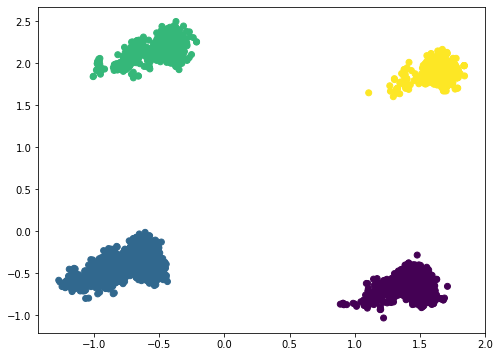

In [15]:
%matplotlib inline

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from numpy import random, float

# data = createClusteredData(100, 5)
data=X_pca
model = KMeans(n_clusters=4)
# data=array_1
# Note I'm scaling the data to normalize it! Important for good results.
model = model.fit(scale(data))       # 對資料正規化很重要

# # We can look at the clusters each data point was assigned to
print(model.labels_)

# # And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
# plt.xlim(0,5)
# plt.ylim(0,5)
plt.show()